# COMPREHENSIVE DATA EXPLORATION WITH PYTHON
[Pedro Marcelino](http://pmarcelino.com) - February 2017

Other Kernels: [Data analysis and feature extraction with Python
](https://www.kaggle.com/pmarcelino/data-analysis-and-feature-extraction-with-python)

----------

<b>'The most difficult thing in life is to know yourself'</b>

This quote belongs to Thales of Miletus. Thales was a Greek/Phonecian philosopher, mathematician and astronomer, which is recognised as the first individual in Western civilisation known to have entertained and engaged in scientific thought (source: https://en.wikipedia.org/wiki/Thales)

I wouldn't say that knowing your data is the most difficult thing in data science, but it is time-consuming. Therefore, it's easy to overlook this initial step and jump too soon into the water.

So I tried to learn how to swim before jumping into the water. Based on [Hair et al. (2013)](https://amzn.to/2JuDmvo), chapter 'Examining your data', I did my best to follow a comprehensive, but not exhaustive, analysis of the data. I'm far from reporting a rigorous study in this kernel, but I hope that it can be useful for the community, so I'm sharing how I applied some of those data analysis principles to this problem.

Despite the strange names I gave to the chapters, what we are doing in this kernel is something like:

1. <b>Understand the problem</b>. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. <b>Univariable study</b>. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
3. <b>Multivariate study</b>. We'll try to understand how the dependent variable and independent variables relate.
4. <b>Basic cleaning</b>. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5. <b>Test assumptions</b>. We'll check if our data meets the assumptions required by most multivariate techniques.

Now, it's time to have fun!

人生中最困难的事情就是认识自己

此报价属于Miletus Thales。泰雷兹（Thales）是希腊/ Phonecian的哲学家，数学家和天文学家，被公认为西方文明中第一个接受娱乐并从事科学思想的人（来源：https：//en.wikipedia.org/wiki/Thales）

我不会说了解您的数据是数据科学中最困难的事情，但这很耗时。因此，很容易忽略此初始步骤，过早跳入水中。

因此，我尝试学习了如何在跳入水中之前游泳。基于Hair等（2013），“检查您的数据”一章中，我尽力遵循了对数据的全面而非详尽的分析。我还没有报告对该内核进行严格的研究，但是我希望它对社区有用，因此，我将分享我如何将某些数据分析原理应用于该问题。

尽管我在各章中使用了奇怪的名字，但我们在此内核中所做的却是这样的：

- 了解问题。我们将研究每个变量，并对它们对这个问题的意义和重要性进行哲学分析。
- 单变量研究。我们将只关注因变量（'SalePrice'），并尝试进一步了解它。
- 多变量研究。我们将尝试了解因变量和自变量之间的关系。
- 基本清洁。我们将清理数据集并处理缺失的数据，离群值和分类变量。
- 测试假设。我们将检查我们的数据是否满足大多数多元技术所要求的假设。

现在，该玩得开心了！

In [2]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# bring in the six packs
df_train = pd.read_csv('datasets/train.csv')

In [14]:
# check the decoration
sorted(df_train.columns)

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle

# 1. So... What can we expect?

In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. I know this is time-consuming, but it will give us the flavour of our dataset.

In order to have some discipline in our analysis, we can create an Excel spreadsheet with the following columns:
* <b>Variable</b> - Variable name.
* <b>Type</b> - Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.
* <b>Segment</b> - Identification of the variables' segment. We can define three possible segments: building, space or location. When we say 'building', we mean a variable that relates to the physical characteristics of the building (e.g. 'OverallQual'). When we say 'space', we mean a variable that reports space properties of the house (e.g. 'TotalBsmtSF'). Finally, when we say a 'location', we mean a variable that gives information about the place where the house is located (e.g. 'Neighborhood').
* <b>Expectation</b> - Our expectation about the variable influence in 'SalePrice'. We can use a categorical scale with 'High', 'Medium' and 'Low' as possible values.
* <b>Conclusion</b> - Our conclusions about the importance of the variable, after we give a quick look at the data. We can keep with the same categorical scale as in 'Expectation'.
* <b>Comments</b> - Any general comments that occured to us.

While 'Type' and 'Segment' is just for possible future reference, the column 'Expectation' is important because it will help us develop a 'sixth sense'. To fill this column, we should read the description of all the variables and, one by one, ask ourselves:

* Do we think about this variable when we are buying a house? (e.g. When we think about the house of our dreams, do we care about its 'Masonry veneer type'?).
* If so, how important would this variable be? (e.g. What is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).
* Is this information already described in any other variable? (e.g. If 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).

After this daunting exercise, we can filter the spreadsheet and look carefully to the variables with 'High' 'Expectation'. Then, we can rush into some scatter plots between those variables and 'SalePrice', filling in the 'Conclusion' column which is just the correction of our expectations.

I went through this process and concluded that the following variables can play an important role in this problem:

* OverallQual (which is a variable that I don't like because I don't know how it was computed; a funny exercise would be to predict 'OverallQual' using all the other variables available).
* YearBuilt.
* TotalBsmtSF.
* GrLivArea.

I ended up with two 'building' variables ('OverallQual' and 'YearBuilt') and two 'space' variables ('TotalBsmtSF' and 'GrLivArea'). This might be a little bit unexpected as it goes against the real estate mantra that all that matters is 'location, location and location'. It is possible that this quick data examination process was a bit harsh for categorical variables. For example, I expected the 'Neigborhood' variable to be more relevant, but after the data examination I ended up excluding it. Maybe this is related to the use of scatter plots instead of boxplots, which are more suitable for categorical variables visualization. The way we visualize data often influences our conclusions.

However, the main point of this exercise was to think a little about our data and expectactions, so I think we achieved our goal. Now it's time for 'a little less conversation, a little more action please'. Let's <b>shake it!</b>


# 1.所以...我们能期待什么？
为了理解我们的数据，我们可以查看每个变量并尝试了解它们的含义以及与该问题的相关性。我知道这很耗时，但是它将带给我们数据集的味道。

为了使我们的分析更具纪律性，我们可以使用以下几列创建一个Excel电子表格：

- **变量**-变量名。
- **类型**-标识变量的类型。该字段有两个可能的值：“数字”或“类别”。 “数字”是指值是数字的变量，“类别”是指值是类别的变量。
- **细分**-标识变量的细分。我们可以定义三个可能的部分：建筑物，空间或位置。当我们说“建筑物”时，是指与建筑物的物理特性相关的变量（例如“ OverallQual”）。当我们说“空间”时，是指一个报告房屋空间属性的变量（例如“ TotalBsmtSF”）。最后，当我们说“位置”时，我们指的是一个变量，该变量提供有关房屋所在位置的信息（例如“邻居”）。
- **期望**-我们对“ SalePrice”中可变影响的期望。我们可以使用带有“高”，“中”和“低”的分类标尺作为可能的值。
- **结论**-在快速浏览数据后，我们得出的关于变量重要性的结论。我们可以保持与“期望”中相同的分类范围。
- **评论**-我们发生的任何一般性评论。

尽管“类型”和“细分”仅供将来参考，但“期望”一栏很重要，因为它将帮助我们发展“第六感”。为了填补这一列，我们应该阅读所有变量的描述，并一步步地问自己：

我们在购买房屋时会考虑这个变量吗？ （例如，当我们想到自己梦寐以求的房子时，我们是否在乎它的“砌体贴面类型”？）。
如果是这样，那么此变量有多重要？ （例如，在外部使用“优质”材料而不是“差”有什么影响？而使用“优质”材料而不是“良好”有什么影响？）。
此信息是否已在其他变量中描述过？ （例如，如果“ LandContour”给出了属性的平坦度，我们是否真的需要知道“ LandSlope”？）。
经过艰巨的练习后，我们可以过滤电子表格并仔细查看带有“高”“期望”的变量。然后，我们可以冲入这些变量和“ SalePrice”之间的一些散点图，在“结论”列中进行填充，这只是对我们预期的修正。

我经历了这个过程，得出结论，以下变量可以在此问题中发挥重要作用：

TotalQual（这是我不喜欢的变量，因为我不知道它是如何计算的；一个有趣的练习是使用所有其他可用变量来预测“ OverallQual”）。
YearBuilt。
TotalBsmtSF。
GrLivArea。
我最后得到了两个“ build”变量（“ OverallQual”和“ YearBuilt”）和两个“ space”变量（“ TotalBsmtSF”和“ GrLivArea”）。这可能有点出乎意料，因为这违反了房地产的口头禅，即所有重要的是“位置，位置和位置”。对于分类变量来说，这种快速的数据检查过程可能有点苛刻。例如，我期望'Neigborhood'变量更加相关，但是在数据检查之后，我最终将其排除在外。也许这与散点图而不是箱线图的使用有关，散点图更适合分类变量的可视化。我们可视化数据的方式通常会影响我们的结论。

但是，此练习的重点是对数据和预期行为进行一些思考，因此我认为我们实现了目标。现在是时候“少谈一点，请多采取一些行动”。让我们摇一摇吧！

# 2. First things first: analysing 'SalePrice'

'SalePrice' is the reason of our quest. It's like when we're going to a party. We always have a reason to be there. Usually, women are that reason. (disclaimer: adapt it to men, dancing or alcohol, according to your preferences)

Using the women analogy, let's build a little story, the story of 'How we met 'SalePrice''.

*Everything started in our Kaggle party, when we were looking for a dance partner. After a while searching in the dance floor, we saw a girl, near the bar, using dance shoes. That's a sign that she's there to dance. We spend much time doing predictive modelling and participating in analytics competitions, so talking with girls is not one of our super powers. Even so, we gave it a try:*

*'Hi, I'm Kaggly! And you? 'SalePrice'? What a beautiful name! You know 'SalePrice', could you give me some data about you? I just developed a model to calculate the probability of a successful relationship between two people. I'd like to apply it to us!'*


# 2.首先，要分析“ SalePrice”
“ SalePrice”是我们追求的原因。就像我们要去参加聚会时一样。我们总是有理由在那里。通常，女人就是那个原因。 （免责声明：根据您的喜好，将其调整为适合男人，跳舞或酗酒的对象）

使用女性的类比，让我们建立一个小故事，即“我们如何认识'SalePrice'的故事。

一切都始于我们寻找舞伴的Kaggle派对。在舞池里搜寻了一会儿之后，我们在酒吧附近看到了一个女孩，穿着舞鞋。这表明她在那里跳舞。我们花费大量时间进行预测建模和参加分析竞赛，因此与女孩聊天并不是我们的超级能力之一。即使这样，我们还是尝试一下：

嗨，我叫卡格利！你呢？ '销售价格'？好漂亮的名字！您知道“ SalePrice”，可以给我一些有关您的数据吗？我刚刚开发了一个模型来计算两个人之间成功建立关系的可能性。我想将它应用于我们！

In [5]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

*'Very well... It seems that your minimum price is larger than zero. Excellent! You don't have one of those personal traits that would destroy my model! Do you have any picture that you can send me? I don't know... like, you in the beach... or maybe a selfie in the gym?'*

*'很好...您的最低价格似乎大于零。 优秀的！ 您没有破坏我模型的个人特征之一！ 您有可以寄给我的照片吗？ 我不知道...喜欢你在沙滩上...还是在健身房自拍？'*

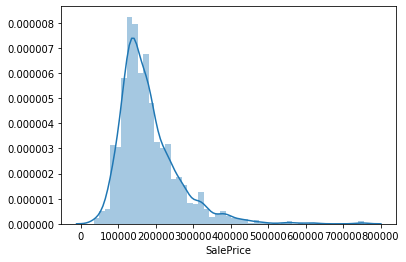

In [11]:

#直方图 https://zh.wikipedia.org/wiki/%E7%9B%B4%E6%96%B9%E5%9B%BE
sns.distplot(df_train['SalePrice']);

*'Ah! I see you that you use seaborn makeup when you're going out... That's so elegant! I also see that you:*

* *<b>Deviate from the normal distribution.</b>*
* *<b>Have appreciable positive skewness.</b>*
* *<b>Show peakedness.</b>*

*This is getting interesting! 'SalePrice', could you give me your body measures?'*


啊！我看到你出去的时候用海产的妆...太优雅了！我也看到你：

- 偏离正态分布。
- 具有明显的正偏斜度。
- 显示峰值。

这越来越有趣了！'(SalePrice)销售价格'，你能给我你的身体测量吗？

In [12]:
# Skewness(偏度)and kurtosis(峰度)
# Skewness https://zh.wikipedia.org/wiki/偏度
# kurtosis link:https://zh.wikipedia.org/wiki/%E5%B3%B0%E5%BA%A6
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


*'Amazing! If my love calculator is correct, our success probability is 97.834657%. I think we should meet again! Please, keep my number and give me a call if you're free next Friday. See you in a while, crocodile!'*

*'"太棒了！如果我的爱计算器是正确的，我们的成功概率是97.834657%。我想我们应该再见面了！请保留我的号码，如果你下周五有空的话，给我打个电话。见你一会儿，鳄鱼！'*

#  'SalePrice', her buddies and her interests
*It is military wisdom to choose the terrain where you will fight. As soon as 'SalePrice' walked away, we went to Facebook. Yes, now this is getting serious. Notice that this is not stalking. It's just an intense research of an individual, if you know what I mean.*

*According to her profile, we have some common friends. Besides Chuck Norris, we both know 'GrLivArea' and 'TotalBsmtSF'. Moreover, we also have common interests such as 'OverallQual' and 'YearBuilt'. This looks promising!*

*To take the most out of our research, we will start by looking carefully at the profiles of our common friends and later we will focus on our common interests.*

# 'SalePrice'，她的伙伴和兴趣

选择要战斗的地形是军事智慧。 一旦“ SalePrice”走开，我们就去了Facebook。 是的，现在情况越来越严重了。 请注意，这不是跟踪。 如果您知道我的意思，那只是对个人的深入研究。

根据她的个人资料，我们有一些共同的朋友。 除了查克·诺里斯（Chuck Norris），我们都知道“ GrLivArea”和“ TotalBsmtSF”。 此外，我们也有共同的利益，例如“ OverallQual”和“ YearBuilt”。 这看起来很有希望！

为了充分利用我们的研究，我们将首先仔细查看我们共同朋友的概况，然后我们将专注于我们的共同利益。

### Relationship with numerical variables
### 与数值变量的关系


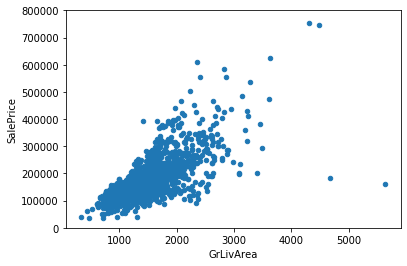

In [17]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

*Hmmm... It seems that 'SalePrice' and 'GrLivArea' are really old friends, with a <b>linear relationship.</b>*

*And what about 'TotalBsmtSF'?*

嗯。。。似乎"SalePrice"和"GrLivArea"是真正的老朋友，有线性关系。

那"TotalBsmtSF"呢？

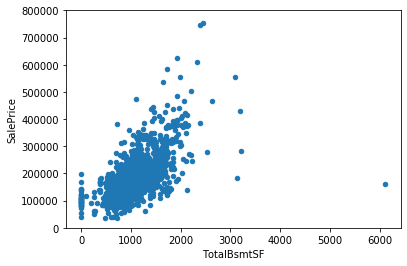

In [18]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

*'TotalBsmtSF' is also a great friend of 'SalePrice' but this seems a much more emotional relationship! Everything is ok and suddenly, in a strong linear (exponential?) reaction, everything changes. Moreover, it's clear that sometimes 'TotalBsmtSF' closes in itself and gives zero credit to 'SalePrice'.*

"TotalBsmtSF"也是"销售价格"的好朋友，但这似乎是一个更情绪化的关系！一切都好，突然，在强烈的线性（指数？）反应，一切都改变了。此外，很明显，有时"TotalBsmtSF"本身关闭，并给予'0'信贷的"销售价格"。

### Relationship with categorical features
### 与分类特征的关系

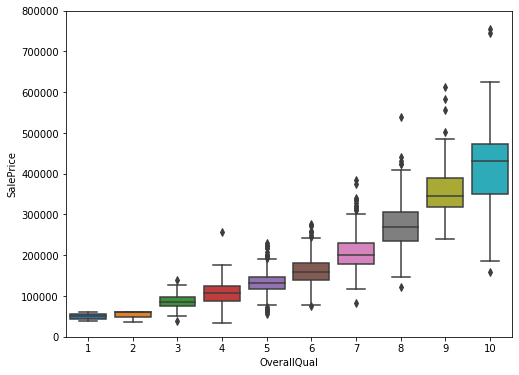

In [19]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

*Like all the pretty girls, 'SalePrice' enjoys 'OverallQual'. Note to self: consider whether McDonald's is suitable for the first date.*

*像所有漂亮的女孩一样，“ SalePrice”喜欢“ OverallQual”。 自我提醒：考虑一下麦当劳是否适合第一次约会。*

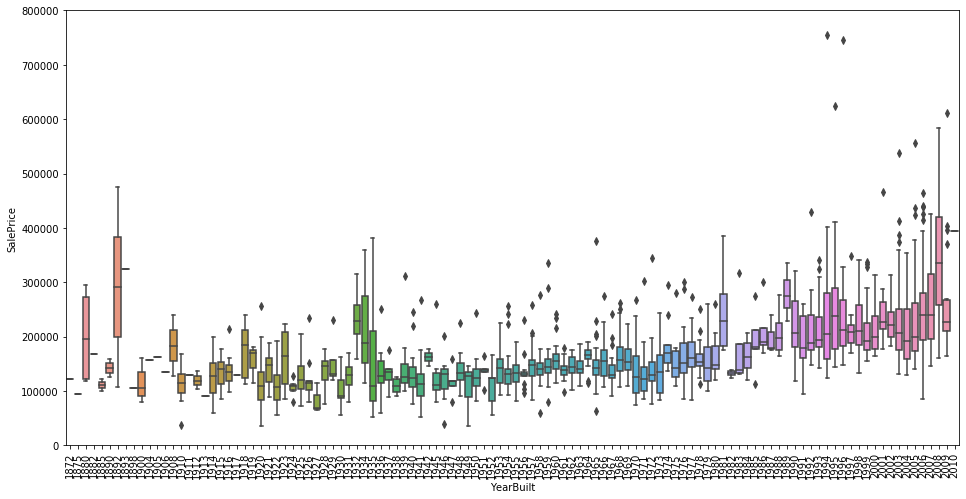

In [20]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

*Although it's not a strong tendency, I'd say that 'SalePrice' is more prone to spend more money in new stuff than in old relics.*

<b>Note</b>: we don't know if 'SalePrice' is in constant prices. Constant prices try to remove the effect of inflation. If 'SalePrice' is not in constant prices, it should be, so than prices are comparable over the years.

尽管这不是一个很强的趋势，但我想说“ SalePrice”比起在旧文物上更倾向于在新事物上花费更多的钱。

注意：我们不知道“ SalePrice”是否为固定价格。 不变价格试图消除通货膨胀的影响。 如果“ SalePrice”不是固定价格，则应该是固定价格，因此多年来的价格是可比的。

### In summary

Stories aside, we can conclude that:

* 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
* 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

We just analysed four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).

That said, let's separate the wheat from the chaff.

### 综上所述
除了故事，我们可以得出以下结论：

“ GrLivArea”和“ TotalBsmtSF”似乎与“ SalePrice”线性相关。 两种关系都是正的，这意味着随着一个变量增加，另一个也增加。 在“ TotalBsmtSF”的情况下，我们可以看到线性关系的斜率特别高。
“ OverallQual”和“ YearBuilt”似乎也与“ SalePrice”相关。 在“ OverallQual”的情况下，这种关系似乎更加牢固，其中的方框图显示了销售价格如何随着整体质量而增加。
我们只是分析了四个变量，但是还有许多其他的我们需要分析。 这里的技巧似乎是正确特征的选择（特征选择），而不是它们之间复杂关系的定义（特征工程）。

就是说，让我们从谷壳中分离出小麦。

# 3. Keep calm and work smart
# 3. 保持冷静，工作聪明

Until now we just followed our intuition and analysed the variables we thought were important. In spite of our efforts to give an objective character to our analysis, we must say that our starting point was subjective. 

As an engineer, I don't feel comfortable with this approach. All my education was about developing a disciplined mind, able to withstand the winds of subjectivity. There's a reason for that. Try to be subjective in structural engineering and you will see physics making things fall down. It can hurt.

So, let's overcome inertia and do a more objective analysis.

直到现在，我们只是遵循我们的直觉，并分析了我们认为重要的变量。尽管我们努力使我们的分析具有客观性质，但我们必须说，我们的出发点是主观的。

作为一名工程师，我对这种方法感到不自在。我所有的教育都是为了培养一个有纪律的头脑，能够经受住主观的风。这是有原因的。试着在结构工程中主观，你会看到物理学使事情倒下。它会伤害。

因此，让我们克服惯性，做一个更客观的分析。



### The 'plasma soup'

'In the very beginning there was nothing except for a plasma soup. What is known of these brief moments in time, at the start of our study of cosmology, is largely conjectural. However, science has devised some sketch of what probably happened, based on what is known about the universe today.' (source: http://umich.edu/~gs265/bigbang.htm) 

To explore the universe, we will start with some practical recipes to make sense of our 'plasma soup':
* Correlation matrix (heatmap style).
* 'SalePrice' correlation matrix (zoomed heatmap style).
* Scatter plots between the most correlated variables (move like Jagger style).

### “等离子汤”
“一开始除了等离子汤外什么都没有。 在我们研究宇宙学的开始时，这些短暂的时刻在很大程度上是推测的。 但是，科学根据对当今宇宙的了解，为可能发生的事情设计了一些草图。 （来源：http://umich.edu/~gs265/bigbang.htm）

为了探索宇宙，我们将从一些实用的食谱入手，以理解我们的“等离子汤”：

- 相关矩阵（热图样式）。
- “ SalePrice”相关矩阵（缩放的热图样式）。
- 关联最密切的变量之间的散点图（像Jagger样式一样移动）。


#### Correlation matrix (heatmap style)
#### 相关矩阵（热图样式）

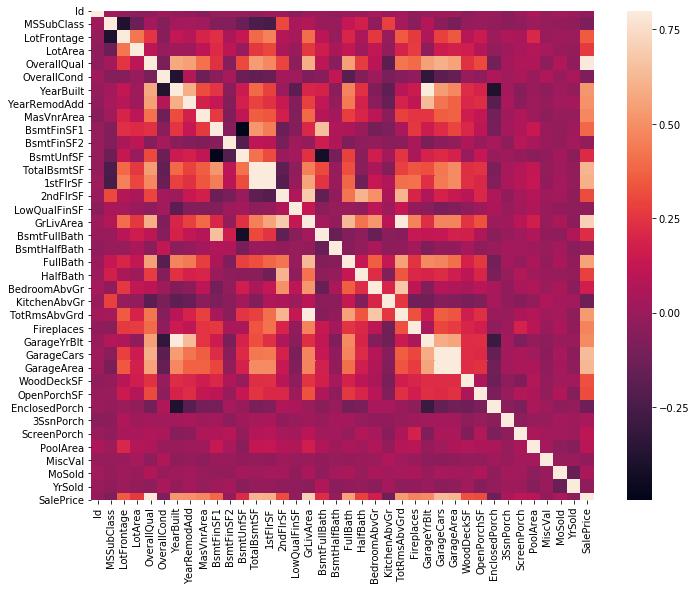

In [23]:
#correlation matrix(相关矩阵)
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In my opinion, this heatmap is the best way to get a quick overview of our 'plasma soup' and its relationships. (Thank you @seaborn!)

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'Garage*X*' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.


我认为，此热图是快速了解我们的“等离子汤”及其关系的最佳方法。 （谢谢@seaborn！）

乍看之下，有两个红色正方形引起了我的注意。第一个引用变量'TotalBsmtSF'和'1stFlrSF'，第二个引用变量'GarageX'。两种情况都表明这些变量之间的相关性有多大。实际上，这种相关性是如此之强，以至于可以指示多重共线性的情况。如果我们考虑这些变量，我们可以得出结论，它们提供的信息几乎相同，因此确实存在多重共线性。热图非常适合检测这种情况，在像特征一样由特征选择主导的问题中，热图是必不可少的工具。

引起我注意的另一件事是“ SalePrice”相关性。我们可以看到我们著名的'GrLivArea'，'TotalBsmtSF'和'OverallQual'都说一个'Hi！'，但是我们还可以看到许多其他变量，应该考虑在内。这就是我们下一步要做的。

#### 'SalePrice' correlation matrix (zoomed heatmap style)
#### “ SalePrice”相关矩阵（缩放的热图样式）

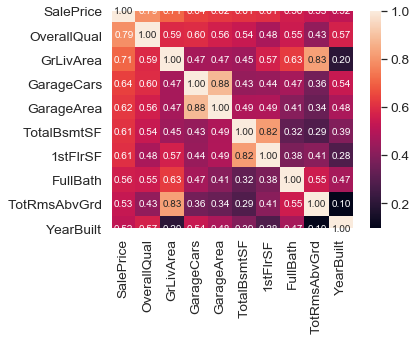

In [25]:
#销售价格相关矩阵
k = 10 # 热图变量数
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index # 降序排序之后，取出前10个
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:

* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
* 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').
* 'FullBath'?? Really? 
* 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?
* Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. I'll leave this as a homework for you.

Let's proceed to the scatter plots.


根据我们的水晶球，这些是与“ SalePrice”最相关的变量。我对此的想法：

- “ OverallQual”，“ GrLivArea”和“ TotalBsmtSF”与“ SalePrice”密切相关。校验！
- “ GarageCars”和“ GarageArea”也是一些最相关的变量。但是，正如我们在最后一个子点中讨论的，适合车库的汽车数量是车库面积的结果。 - “ GarageCars”和“ GarageArea”就像孪生兄弟。您将永远无法区分它们。因此，我们在分析中只需要这些变量之一（由于与“ SalePrice”的相关性较高，因此可以保留“ GarageCars”）。
- “ TotalBsmtSF”和“ 1stFloor”似乎也是孪生兄弟。我们可以保持'TotalBsmtSF'只是说我们的第一个猜测是正确的（重新读'So ...我们可以期待什么？'）。
- “FullBath”？真？
- “ TotRmsAbvGrd”和“ GrLivArea”，又是双胞胎兄弟。该数据集来自切尔诺贝利吗？
- 啊...“ YearBuilt” ...似乎“ YearBuilt”与“ SalePrice”略相关。老实说，让我想到“ YearBuilt”使我感到害怕，因为我开始觉得我们应该做一些时间序列分析以实现这一目标。我将把它作为作业留给您。

让我们继续进行散点图。

#### Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)

Get ready for what you're about to see. I must confess that the first time I saw these scatter plots I was totally blown away! So much information in so short space... It's just amazing. Once more, thank you @seaborn! You make me 'move like Jagger'!

“ SalePrice”和相关变量之间的散点图（像Jagger样式一样移动）
为您即将看到的东西做好准备。 我必须承认，第一次看到这些散点图时，我完全被震撼了！ 在如此短的空间中提供了如此多的信息……真是太神奇了。 再次感谢@seaborn！ 你让我“像Jagger一样移动”！

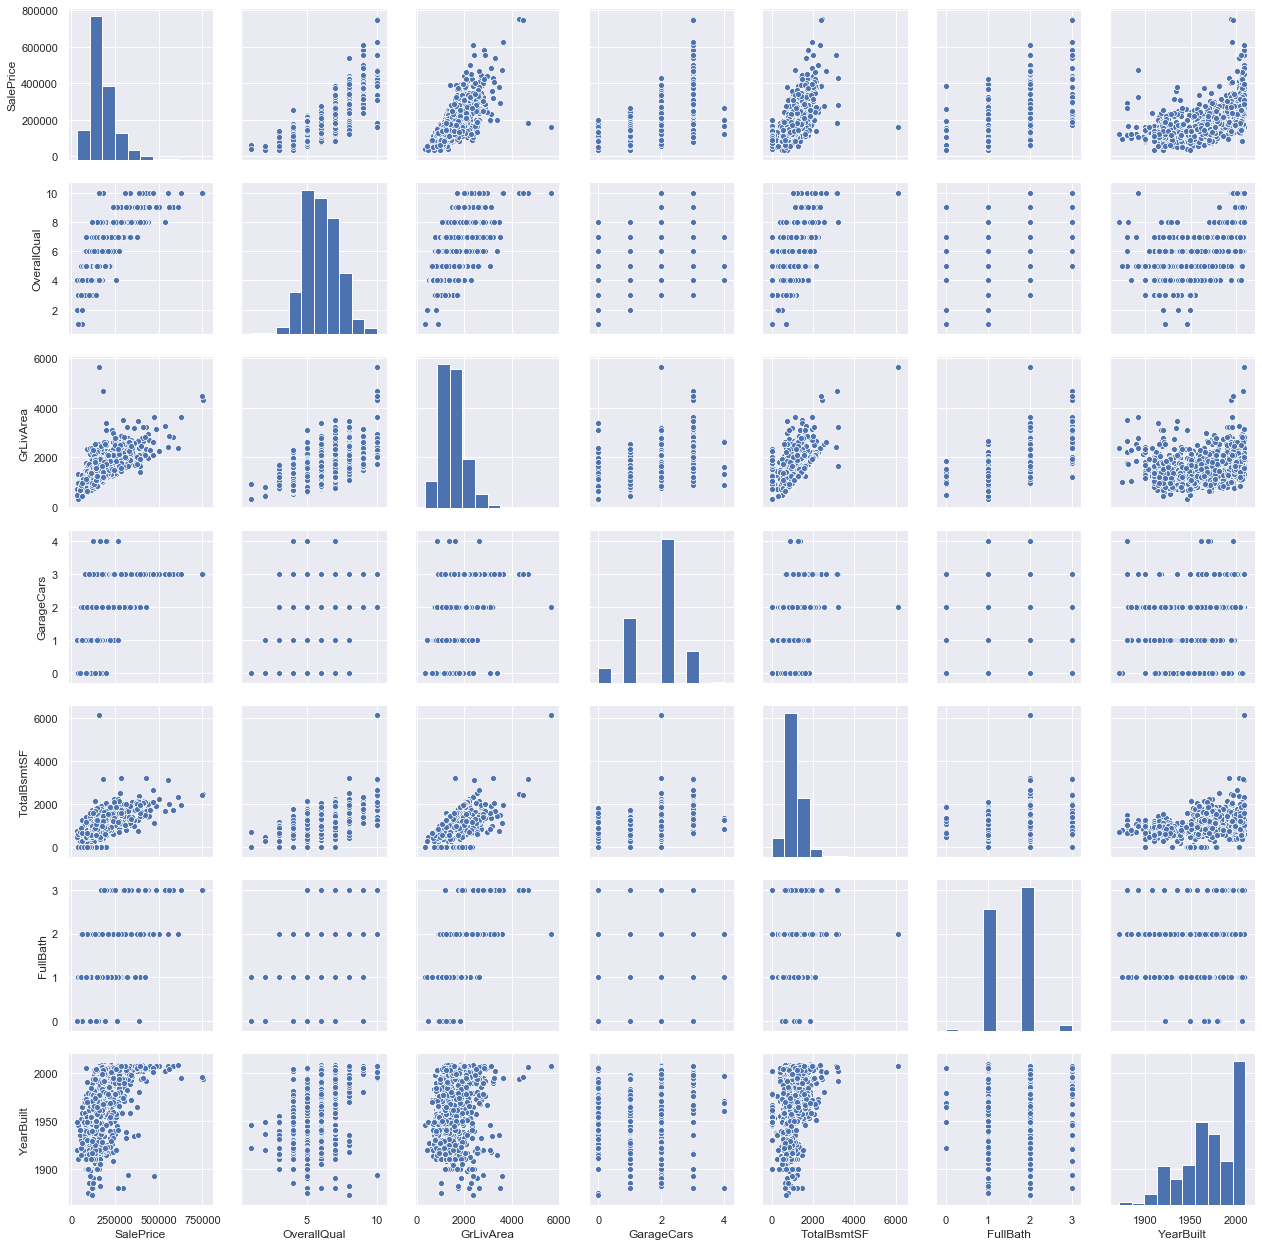

In [30]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

Ok, enough of Rorschach test for now. Let's move forward to what's missing: missing data!

尽管我们已经了解了一些主要数据，但此巨型散点图为我们提供了有关变量关系的合理思路。

我们可能会发现有趣的数字之一是“ TotalBsmtSF”和“ GrLiveArea”之间的数字。在此图中，我们可以看到点画了一条直线，几乎像一个边界。完全有道理的是，大多数点都位于该线以下。地下室的面积可以等于地面上的居住面积，但是地下室的面积不能大于地面上的居住面积（除非您要购买掩体）。

关于“ SalePrice”和“ YearBuilt”的图也可以使我们思考。在“点云”的底部，我们看到的几乎是一个害羞的指数函数（富有创造力）。我们还可以在“点云”的上限中看到这种趋势（甚至更具创造力）。另外，请注意关于过去几年的点集如何趋于保持在此限制之上（我只是想说现在价格上涨得更快）。

好的，到目前为止，足够进行Rorschach测试。让我们前进到缺失的地方：缺失的数据！

# 4. Missing data

Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

# 4.缺少数据
考虑丢失数据时的重要问题：

- 丢失的数据有多普遍？
- 丢失数据是随机的还是有规律的？

出于实际原因，这些问题的答案很重要，因为缺少数据可能意味着样本量减少。 这可能会阻止我们继续进行分析。 此外，从实质的角度来看，我们需要确保丢失的数据过程不存在偏见并掩盖不便的事实。

In [37]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Let's analyse this to understand how to handle the missing data.

We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

In what concerns the remaining cases, we can see that 'Garage*X*' variables have the same number of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20$ in 5$ problems). Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'Garage*X*' variables. The same logic applies to 'Bsmt*X*' variables.

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

让我们对其进行分析，以了解如何处理丢失的数据。

我们将考虑到，当丢失超过15％的数据时，我们应该删除相应的变量并假装它不存在。这意味着在这些情况下，我们不会尝试任何技巧来填充丢失的数据。据此，我们应删除一组变量（例如“ PoolQC”，“ MiscFeature”，“ Alley”等）。关键是：我们会错过这些数据吗？我不这么认为。这些变量似乎都不是很重要，因为其中大多数都不是我们在购买房屋时要考虑的方面（也许这就是数据丢失的原因？）。
此外，仔细观察变量，我们可以说像'PoolQC'，'MiscFeature'和'FireplaceQu'这样的变量是异常值的强力候选者，因此我们很乐意删除它们。

在剩下的情况下，我们可以看到“ GarageX”变量具有相同数量的丢失数据。我敢打赌，缺失的数据指的是同一组观察结果（尽管我不会对其进行检查；仅为5％，我们不应花费在$5的问题上花费$20）。由于有关车库的最重要信息由“ GarageCars”表示，并考虑到我们仅在谈论丢失数据的5％，因此我将删除提及的“ GarageX”变量。相同的逻辑适用于“ BsmtX”变量。

关于“ MasVnrArea”和“ MasVnrType”，我们可以认为这些变量不是必需的。此外，它们与已经考虑的'YearBuilt'和'OverallQual'有很强的相关性。因此，如果删除“ MasVnrArea”和“ MasVnrType”，我们将不会丢失信息。

最后，我们在“Electrical”中缺少一个观察。由于这只是一个观察值，因此我们将删除该观察值并保留变量。

总之，要处理丢失的数据，我们将删除所有带有丢失数据的变量，但变量“ Electrical”除外。在“电子”中，我们将删除缺少数据的观测值。

In [38]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1) # 删除数据缺失个数大于1的数据特征
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)# 删除【Electrical】数据缺失的那一行
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

# Out liers!

Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

# 离群值!
离群值也是我们应注意的事情。 为什么？ 因为离群值可以显着影响我们的模型，并且可以成为有价值的信息来源，所以可以为我们提供有关特定行为的见解。

离群值是一个复杂的主题，值得更多关注。 在这里，我们将通过“ SalePrice”的标准偏差和一组散点图进行快速分析。

### Univariate analysis
### 单变量分析

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

这里主要关注的是建立一个将观察值定义为异常值的阈值。 为此，我们将对数据进行标准化。 在这种情况下，数据标准化意味着将数据值转换为平均值为0且标准差为1。

In [40]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


How 'SalePrice' looks with her new clothes:

* Low range values are similar and not too far from 0.
* High range values are far from 0 and the 7.something values are really out of range.

For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.


她的新衣服的“ SalePrice”外观如何：

- 低范围值相似，并且距离0不太远。
- 高范围值距离0远，而7.some值确实超出范围。

现在，我们不会将这些值中的任何一个视为离群值，但应谨慎使用这两个7.something值。

### Bivariate analysis
### 双变量分析

We already know the following scatter plots by heart. However, when we look to things from a new perspective, there's always something to discover. As Alan Kay said, 'a change in perspective is worth 80 IQ points'.

我们已经知道了以下散点图。 但是，当我们从新的角度看待事物时，总会有发现的地方。 正如艾伦·凯（Alan Kay）所说，“改变观点值得80个智商点”。

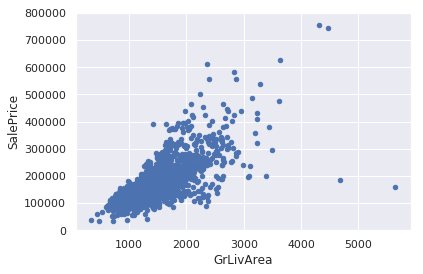

In [17]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

What has been revealed:

* The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
* The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

揭示了什么：

具有较大“ GrLivArea”的两个值似乎很奇怪，并且它们并未跟随人群。 我们可以推测为什么会这样。 也许他们指的是农业地区，这可以解释价格低廉的原因。 我对此不确定，但我很有把握，这两点并不代表典型案例。 因此，我们将它们定义为离群值并将其删除。
图顶部的两个观测值是我们应注意的7.something观测值。 它们看起来像是两种特殊情况，但是它们似乎在追随潮流。 因此，我们将保留它们。

In [47]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


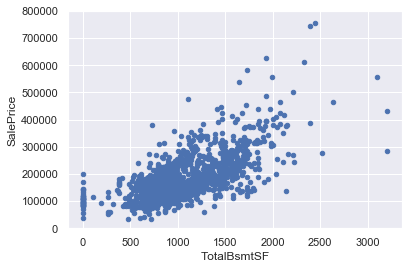

In [48]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it. We can live with that, so we'll not do anything.

我们可能会想消除一些观察结果（例如TotalBsmtSF> 3000），但我认为这样做是不值得的。 我们可以忍受，所以我们什么也不会做。

# 5. Getting hard core
# 5. 来点儿硬核

In Ayn Rand's novel, 'Atlas Shrugged', there is an often-repeated question: who is John Galt? A big part of the book is about the quest to discover the answer to this question.

I feel Randian now. Who is 'SalePrice'?

The answer to this question lies in testing for the assumptions underlying the statistical bases for multivariate analysis. We already did some data cleaning and discovered a lot about 'SalePrice'. Now it's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.

According to [Hair et al. (2013)](https://amzn.to/2uC3j9p), four assumptions should be tested:

* <b>Normality</b> - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely  on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

* <b>Homoscedasticity</b> - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' [(Hair et al., 2013)](https://amzn.to/2uC3j9p). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

* <b>Linearity</b>- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

* <b>Absence of correlated errors</b> - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

What do you think Elvis would say about this long explanation? 'A little less conversation, a little more action please'? Probably... By the way, do you know what was Elvis's last great hit?

(...)

The bathroom floor.



在艾恩·兰德（Ayn Rand）的小说《耸耸肩膀》（Atlas Shrugged）中，经常出现一个问题：谁是约翰·加尔特（John Galt）？这本书的很大一部分是关于寻找这个问题答案的探索。

我现在觉得randian。谁是“ SalePrice”？

这个问题的答案在于测试多变量分析的统计基础所基于的假设。我们已经进行了一些数据清理，并发现了很多有关“ SalePrice”的信息。现在该深入了解“ SalePrice”如何符合统计假设，从而使我们能够应用多元技术。

根据头发等。 （2013），应检验四个假设：

- 正态性-当谈论正态性时，我们的意思是数据看起来应该像正态分布。这很重要，因为几个统计检验都依赖于此（例如t统计）。在本练习中，我们将仅检查“ SalePrice”的单变量正态性（这是一种有限的方法）。请记住，单变量正态性不能确保多元正态性（这是我们希望拥有的），但可以提供帮助。要考虑的另一个细节是，在大样本（> 200个观测值）中，正态性不是这样的问题。但是，如果我们解决正态性，就可以避免很多其他问题（例如，异方差性），这就是我们进行此分析的主要原因。

- 同方性-我只是希望我写对了。同质性是指“假设因变量在预测变量范围内表现出相等的方差水平”（Hair等人，2013）。同质性是可取的，因为我们希望误差项在自变量的所有值上都相同。

- 线性-评估线性的最常用方法是检查散点图并搜索线性模式。如果模式不是线性的，则值得探索数据转换。但是，由于我们所看到的大多数散点图似乎都具有线性关系，因此我们不会对此进行讨论。

- 缺少相关错误-正如定义所暗示的，相关错误发生在一个错误与另一个错误相关时。例如，如果一个正误差系统地产生一个负误差，则意味着这些变量之间存在关联。这通常发生在时间序列中，其中某些模式与时间相关。我们也不会涉及到这一点。但是，如果检测到某些东西，请尝试添加一个变量，该变量可以解释所获得的效果。这是相关错误的最常见解决方案。

您认为猫王会对这个冗长的解释怎么说？ “少聊一点，请多采取一些行动”？大概吧...顺便问一下，您知道猫王的最后一次成功是什么吗？

（......）

浴室地板。

### In the search for normality
### 在寻找常态

The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

* <b>Histogram</b> - Kurtosis and skewness.
* <b>Normal probability plot</b> - Data distribution should closely follow the diagonal that represents the normal distribution.

这里的重点是要以非常精简的方式测试“ SalePrice”。 我们将注意以下事项：

- 直方图-峰度和偏度。
- 正态概率图-数据分布应紧跟代表正态分布的对角线。

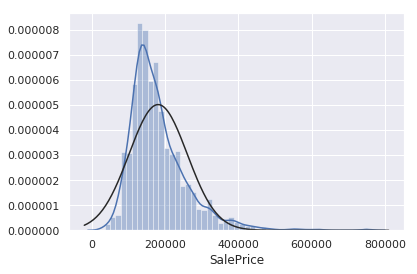

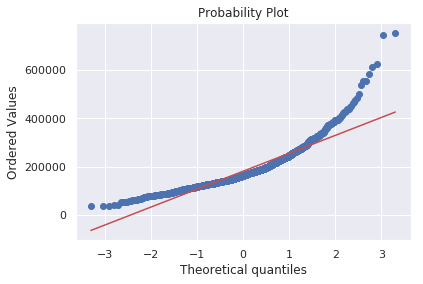

In [20]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. When I discovered this, I felt like an Hogwarts' student discovering a new cool spell.

*Avada kedavra!*

好的，“ SalePrice”是不正常的。 它显示“峰值”，正偏度，并且不遵循对角线。

但是，一切并没有丢失。 简单的数据转换可以解决问题。 这是您可以在统计书籍中学到的很棒的东西之一：如果出现正偏斜，对数转换通常会很好地工作。 当我发现这一点时，我感觉就像是霍格沃茨的学生发现了一个新的酷法术。

Avada kedavra！

In [49]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

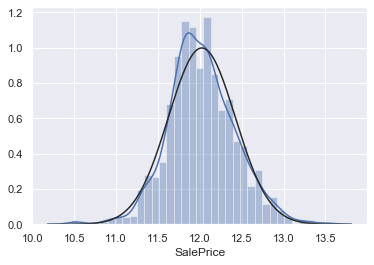

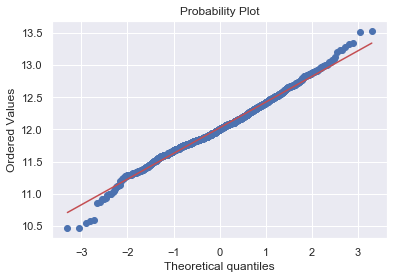

In [50]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Done! Let's check what's going on with 'GrLivArea'.

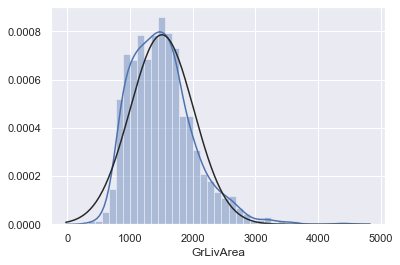

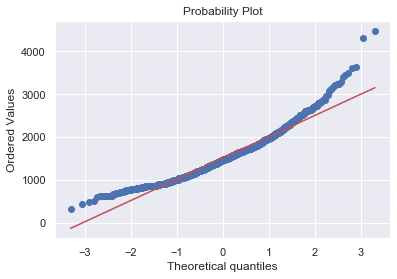

In [51]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Tastes like skewness... *Avada kedavra!*

像偏斜一样的味道... * Avada kedavra！*

In [52]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

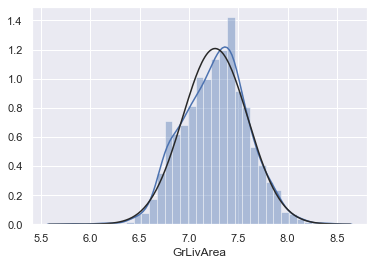

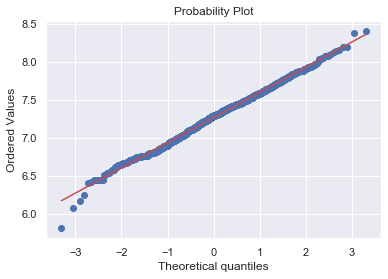

In [53]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Next, please...

下一个...

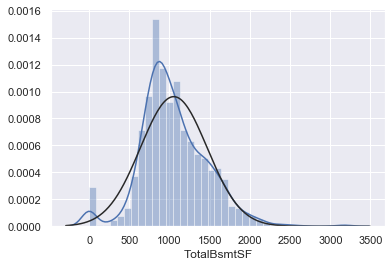

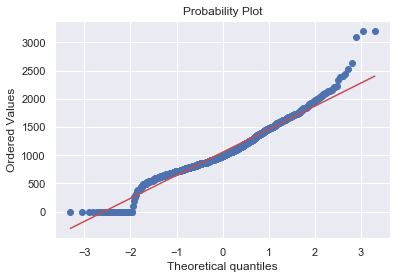

In [54]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

Ok, now we are dealing with the big boss. What do we have here?

* Something that, in general, presents skewness.
* A significant number of observations with value zero (houses without basement).
* A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

I'm not sure if this approach is correct. It just seemed right to me. That's what I call 'high risk engineering'.

好吧，现在我们正在与大老板打交道。 我们有什么在这里？

- 总的来说，有些东西偏斜。
- 大量值为零的观测值（无地下室的房屋）。
- 一个大问题是因为值零不允许我们进行对数转换。

要在此处应用对数转换，我们将创建一个变量，该变量可以具有或不具有地下室的效果（二进制变量）。 然后，我们将对所有非零观测值进行对数转换，而忽略那些值为零的观测值。 这样，我们可以转换数据，而不会失去具有或不具有地下室的影响。

我不确定这种方法是否正确。 在我看来，这似乎是正确的。 这就是我所说的“高风险工程”。

In [55]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [56]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

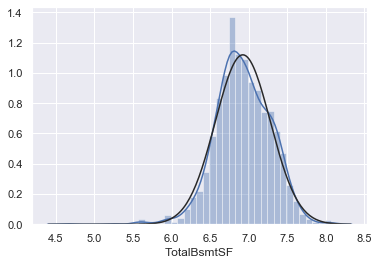

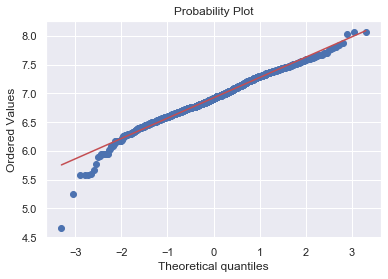

In [57]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### In the search for writing 'homoscedasticity' right at the first attempt
### 第一次尝试寻找“同质性”。

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

Starting by 'SalePrice' and 'GrLivArea'...

测试两个度量变量的均方差的最佳方法是图形方式。 通过圆锥（在图形的一侧较小的色散，在相反侧的较大色散）或菱形（在分布中心的大量点）来表示偏离均等色散的形状。

从“ SalePrice”和“ GrLivArea”开始...

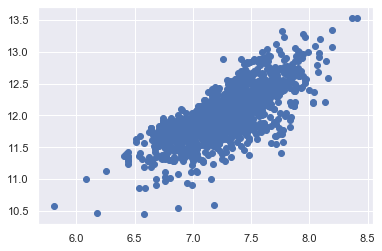

In [58]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check 'Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)'). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

Now let's check 'SalePrice' with 'TotalBsmtSF'.

此散点图的较旧版本（在对数转换之前）具有圆锥形状（返回并检查“'SalePrice'和相关变量之间的散点图（移动为Jagger样式）”）。 如您所见，当前散点图不再具有圆锥形状。 那就是normality的力量！ 仅通过确保某些变量的正态性，我们就解决了均方差问题。

现在，让我们用“ TotalBsmtSF”检查“ SalePrice”。

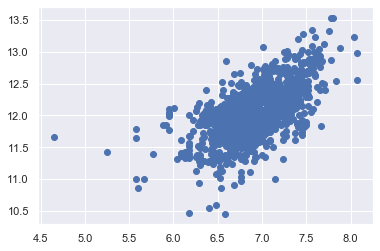

In [59]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'. Cool!

可以说，通常，“ SalePrice”在“ TotalBsmtSF”的整个范围内均表现出相同的方差水平。 Cool！

# Last but not the least, dummy variables
# 最后但并非最不重要的，虚拟变量

Easy mode.

简易模式。

In [60]:
#convert categorical variable into dummy(将分类变量转换为虚拟变量)
df_train = pd.get_dummies(df_train)

In [61]:
df_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


# Conclusion
# 结论

That's it! We reached the end of our exercise.

Throughout this kernel we put in practice many of the strategies proposed by [Hair et al. (2013)](https://amzn.to/2uC3j9p). We philosophied about the variables, we analysed 'SalePrice' alone and with the most correlated variables, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables. That's a lot of work that Python helped us make easier.

But the quest is not over. Remember that our story stopped in the Facebook research. Now it's time to give a call to 'SalePrice' and invite her to dinner. Try to predict her behaviour. Do you think she's a girl that enjoys regularized linear regression approaches? Or do you think she prefers ensemble methods? Or maybe something else?

It's up to you to find out.

而已！ 我们到了练习的结尾。

在整个内核中，我们实践了[Hair等人提出的许多策略。（2013）](https://amzn.to/2uC3j9p)。 我们对变量进行了哲学思考，仅对“ SalePrice”进行了分析，并使用了相关性最高的变量，处理了缺失的数据和异常值，测试了一些基本的统计假设，甚至将分类变量转换为虚拟变量。 Python帮助我们简化了很多工作。

但是任务还没有结束。 请记住，我们的故事在Facebook研究中停止了。 现在该打电话给“ SalePrice”并邀请她共进晚餐。 尝试预测她的行为。 您认为她是一个喜欢正规线性回归方法的女孩吗？ 还是您认为她更喜欢集成方法？ 也许还有其他东西？

由您决定。

# <b>References</b>
* [My blog](http://pmarcelino.com)
* [My other kernels](https://www.kaggle.com/pmarcelino/data-analysis-and-feature-extraction-with-python)
* [Hair et al., 2013, Multivariate Data Analysis, 7th Edition](https://amzn.to/2JuDmvo)

# Acknowledgements

Thanks to [João Rico](https://www.linkedin.com/in/joaomiguelrico/) for reading drafts of this.

# 致谢
感谢[João Rico](https://www.linkedin.com/in/joaomiguelrico/)阅读本文草稿。